# Day 1 Eindopdracht “Statistics for Data Science”

Voor deze eindopdracht zijn er twee mogelijkheden. Hieronder volgt ten eerste de
beschrijving van een opdracht gebaseerd op een dataset over universiteiten in de Verenigde
Staten. Het is ook mogelijk om de eindopdracht te baseren op een eigen (bedrijfs)dataset.
Aan het einde van dit document volgt meer informatie hierover.

Voor beide opdrachten geldt dat de resultaten in drie delen ingeleverd moeten worden,
telkens samengevat in een bondig rapport. In dit rapport moet voor elke deelanalyse dui-
delijk zijn wat het doel van de berekening is, wat de uitkomst is en vooral wat de conclusie
is.

Zorg ervoor dat er voldoende details gegeven zijn, bijvoorbeeld bij het uitvoeren van
een statistische toets is het van belang om:
1. de keuze van de toets duidelijk te motiveren;
2. de nul- en alternatieve hypothese te beschrijven;
3. de p-waarde te rapporteren;
4. de uiteindelijke conclusie te rapporteren in termen van de toepassing (dus niet alleen
“de nul-hypothese wordt verworpen”, maar ook wat dit dan betekent).


Voor elk deel van de opdracht moet een rapport in pdf formaat ingeleverd worden, sa-
men met de volledige Python (of R) code in een apart bestand. Het inleveren verloopt via
Canvas (zie onder “Assignments”). Het verwerken van de resultaten met behulp van bij-
voorbeeld een Jupyter Notebook of R-Markdown is prima, maar probeer onnodige output
te vermijden en lever ook altijd een pdf versie in.
De deadlines zijn als volgt:
Deel 1: zondag, 28 september (voor het einde van de dag);
Deel 2: zondag, 12 oktober (voor het einde van de dag);
Deel 3: zondag, 26 oktober (voor het einde van de dag).



## 1 Opdracht obv. universiteitsdata
Het databestand college statistics.csv bevat informatie over 777 universiteiten en
colleges in de Verenigde Staten in ´e´en specifiek jaar.

De variabelen in deze dataset zijn:

- Privé (Private): Indicator voor publiek/persoonlijk
- Aanvragen (Apps): Aantal ontvangen aanvragen
- Acceptatie (Accept): Aantal toegelaten aanvragers
- Inschrijving (Enroll): Aantal nieuwe ingeschreven studenten
- Top10perc: Percentage nieuwe studenten die in de top 10% van hun middelbare schoolklasse zaten
- Top25perc: Percentage nieuwe studenten die in de top 25% van hun middelbare schoolklasse zaten
- F.Undergrad: Aantal voltijd bachelorstudenten
- P.Undergrad: Aantal deeltijd bachelorstudenten
- Outstate: Collegegeld voor studenten van buiten de staat
- Kamer en Board (Room.Board): Kosten voor kamer en maaltijden
- Boeken (Books): Geschatte kosten voor boeken
- Persoonlijk (Personal): Geschatte persoonlijke uitgaven
- PhD: Percentage faculteit met een Ph.D.
- Terminale graad (Terminal): Percentage faculteit met een terminale graad
- S.F.Ratio: Studenten/faculteit ratio
- Perc.alumni: Percentage alumni die doneren
- Uitgaven (Expend): Onderwijsexpenditures per student
- Afstudeerpercentage (Grad.Rate): Afstudeerpercentage

## 1 Opdracht deel 2 obv. universiteitsdata
 Maak een model dat het aantal aanmeldingen kan voorspellen op basis van factoren
 die voorafgaand aan binnenkomen van de aanmeldingen beschikbaar zijn. Maak
 daarom bijvoorbeeld geen gebruik van de variabelen Accept en Enroll. Deze zijn
 namelijk duidelijk een gevolg (en geen oorzaak) van het aantal aanmeldingen. Volg
 hierbij de volgende stappen.

 (a) Voer eerst een test uit voor de hypothese dat het aantal aanmeldingen een
 normale verdeling volgt. Wat is je conclusie? Is deze conclusie van belang voor
 het verder modelleren van deze variabele?

 (b) Deel de data eerst op willekeurige manier op in een “estimation” en “test”
 sample. Neem 600 universiteiten in de estimation sample. Zorg ervoor dat deze
 opdeling reproduceerbaar is.

 Hint Python: gebruik functies random.seed en pandas.DataFrame.sample.
 Hint R: gebruik functies set.seed en sample.

 (c) Maak eerst een lineair model voor het aantal aanmeldingen. Gebruik hiervoor
 alleen de estimation sample.

 (d) Pas backward elimination toe om het aantal variabelen terug te brengen.

 (e) Voer diverse toetsen uit om de aannamen van het lineaire model te testen.

 (f) Maak vervolgens een model voor de logaritme van het aantal aanmeldingen (ook
 weer met backward elimination).

 (g) Voer opnieuw de diverse toetsen uit om de aannamen van het model te testen.

 (h) Welk van de twee modellen heeft de voorkeur, en waarom?

 (i) Probeer het gekozen model nog verder te verbeteren: denk aan het toevoegen
 van transformaties van verklarende variabelen.

 (j) Hoe interpreteer je de co¨ effici¨ enten in het model dat je uiteindelijk hebt gevon
den? Wees hierbij heel precies. Welke factoren zijn uiteindelijk het meest van
 belang?
 
 (k) Gebruik het uiteindelijke model om voorspellingen te maken voor de waarne
mingen in de estimation en de test sample.

 (l) Vergelijk de voorspelkracht (mbv. mean squared error) van het model op de
 estimation sample met die op de test sample. Wat concludeer je

In [ ]:
pip install seaborn

In [32]:
# benodigde libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as stats

In [ ]:
df = pd.read_csv('college_statistics.csv')
df.head(100)

# Deel 2



 <small style="color: lightblue;"># 2(a) Voer eerst een test uit voor de hypothese dat het aantal aanmeldingen eennormale verdeling volgt. Wat is je conclusie? Is deze conclusie van belang voor het verder modelleren van deze variabele?</small>

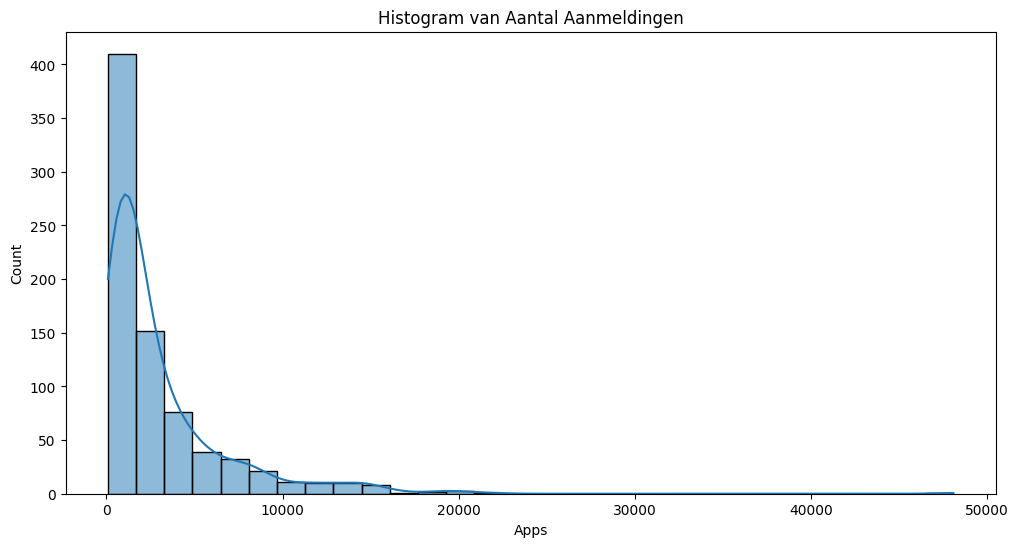

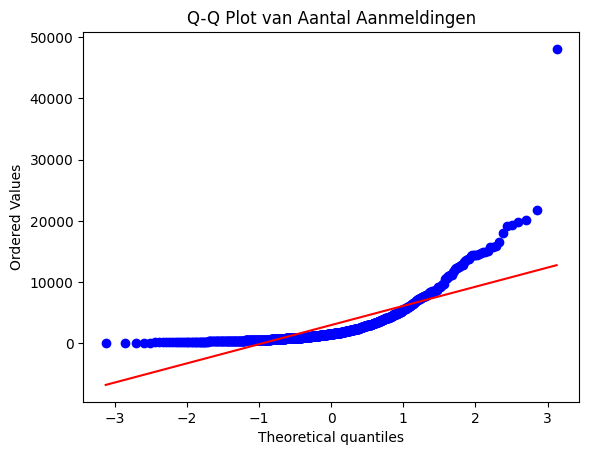

{'n': 777, 'min': 81.0, 'max': 48094.0, 'mean': 3001.6383526383524, 'std': 3870.2014844352893}


In [ ]:
# Histogram en Q-Q plot  
plt.figure(figsize=(12, 6))
sns.histplot(df['Apps'], kde=True, bins=30)
plt.title('Histogram van Aantal Aanmeldingen')
plt.show()

stats.probplot(df['Apps'], dist="norm", plot=plt)
plt.title('Q-Q Plot van Aantal Aanmeldingen')
plt.show()

# 2) Snelle sanity checks
y = df["Apps"]  # aantal aanmeldingen
assert np.issubdtype(y.dtype, np.number), "Doelvariabele moet numeriek zijn."
print({"n": y.shape[0], "min": float(y.min()), "max": float(y.max()), "mean": float(y.mean()), "std": float(y.std(ddof=1))})

Het histogram toont een scheve verdeling (rechtsscheef), waarbij de meeste waarden zich aan de linkerkant bevinden en er een lange staart naar rechts is. Dit wordt bevestigd door de Q-Q plot, waar de punten duidelijk afwijken van de rechte lijn die een normale verdeling zou aangeven.

Conclusie:
Histogram: De verdeling van het aantal aanmeldingen is rechtsscheef en niet symmetrisch.
Q-Q Plot: De punten wijken sterk af van de rechte lijn, wat aangeeft dat de data niet normaal verdeeld is.

 <small style="color: lightblue;"> 2 (b) Deel de data eerst op willekeurige manier op in een “estimation” en “test”
 sample. Neem 600 universiteiten in de estimation sample. Zorg ervoor dat deze
 opdeling reproduceerbaar is.

 Hint Python: gebruik functies random.seed en pandas.DataFrame.sample.
 Hint R: gebruik functies set.seed en sample</small>


In [55]:

# Aantal universiteiten in de dataset
aantal_universiteiten = len(df)
print(f"Aantal universiteiten in de dataset: {aantal_universiteiten}")

# Splits de data
import random

random.seed(42)
estimation_sample = df.sample(n=600, random_state=42)
test_sample = df.drop(estimation_sample.index)

print(f"Estimation sample grootte: {len(estimation_sample)}")
print(f"Test sample grootte: {len(test_sample)}")


Aantal universiteiten in de dataset: 777
Estimation sample grootte: 600
Test sample grootte: 177


CONCLUSIE: Estimation sample grootte: 600
Dit betekent dat er willekeurig 600 universiteiten zijn geselecteerd uit de oorspronkelijke dataset. Deze subset wordt gebruikt als trainingsset om het model te bouwen en te optimaliseren.
Test sample grootte: 177
Dit betekent dat de resterende 177 universiteiten in de dataset worden gebruikt als testset. Deze subset wordt gebruikt om de prestaties van het model te evalueren en te controleren of het goed generaliseert naar nieuwe data

 <small style="color: lightblue;"> Extra data checks uitvoeren</small>


In [ ]:
# Voor de zekerheid controleer ik de types van de kolommen omdat je voor lineaire regressie numerieke waarden nodig hebt.

print(df.dtypes)

In [ ]:
# Controleer op ontbrekende waarden in de kolommen 'Apps', 'Accept', en 'Enroll'
missing_values = estimation_sample[['Apps', 'Accept', 'Enroll']].isnull().sum()

print("Ontbrekende waarden in de kolommen 'Apps', 'Accept', en 'Enroll':")
print(missing_values)

 <small style="color: lightblue;">2 (c) Maak eerst een lineair model voor het aantal aanmeldingen. Gebruik hiervoor
 alleen de estimation sample.</small>


In [65]:
 
# Zorg dat estimation_sample bestaat door eerst cell 9 uit te voeren
X = estimation_sample[['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']]
y = estimation_sample['Apps']

# Voeg een constante toe
X = sm.add_constant(X)

# Lineair model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     492.6
Date:                Fri, 10 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:48:17   Log-Likelihood:                -5007.9
No. Observations:                 600   AIC:                         1.005e+04
Df Residuals:                     583   BIC:                         1.012e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -373.3321    441.500     -0.846      

Analyse van de coëfficiënten:
Hier is een overzicht van de variabelen en hun p-waarden:

const:

p-waarde: 0.398 (niet significant, > 0.05)
Actie: Niet meenemen.
Accept:

p-waarde: 0.000 (significant, < 0.05)
Actie: Meenemen.
Enroll:

p-waarde: 0.000 (significant, < 0.05)
Actie: Meenemen.
Top10perc:

p-waarde: 0.000 (significant, < 0.05)
Actie: Meenemen.
Top25perc:

p-waarde: 0.001 (significant, < 0.05)
Actie: Meenemen.
F.Undergrad:

p-waarde: 0.015 (significant, < 0.05)
Actie: Meenemen.
P.Undergrad:

p-waarde: 0.042 (significant, < 0.05)
Actie: Meenemen.
Outstate:

p-waarde: 0.000 (significant, < 0.05)
Actie: Meenemen.
Room.Board:

p-waarde: 0.045 (significant, < 0.05)
Actie: Meenemen.
Books:

p-waarde: 0.775 (niet significant, > 0.05)
Actie: Niet meenemen.
Personal:

p-waarde: 0.841 (niet significant, > 0.05)
Actie: Niet meenemen.
Variabelen om mee te nemen in het model:
De volgende variabelen hebben significante coëfficiënten en kunnen worden meegenomen in het model:

Accept
Enroll
Top10perc
Top25perc
F.Undergrad
P.Undergrad
Outstate
Room.Board
Codevoorbeeld voor een aangepast model:
Hier is een voorbeeld van hoe je het model kunt aanpassen:

Conclusie:
Door alleen de significante variabelen mee te nemen, wordt het model betrouwbaarder en voorkom je dat irrelevante variabelen de voorspellingen verstoren. Test na deze aanpassing opnieuw de aannames van het model (zoals normaliteit van residuen en multicollineariteit).



 <small style="color: lightblue;">2(d) Pas backward elimination toe om het aantal variabelen terug te brengen.</small>

In [63]:

# Iteratief verwijderen van variabelen met p-waarde > 0.05
while True:
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues
    max_p = p_values.max()
    if max_p > 0.05:  # Controleer of de hoogste p-waarde groter is dan 0.05
        excluded_feature = p_values.idxmax()  # Vind de variabele met de hoogste p-waarde
        print(f"Verwijderen van variabele: {excluded_feature} met p-waarde: {max_p}")
        X = X.drop(columns=[excluded_feature])  # Verwijder de variabele
    else:
        break

# Toon het uiteindelijke model
print(model.summary())





Verwijderen van variabele: const met p-waarde: 0.30675894326465325
Verwijderen van variabele: Grad.Rate met p-waarde: 0.10193776328616183
Verwijderen van variabele: P.Undergrad met p-waarde: 0.06962271381514054
Verwijderen van variabele: F.Undergrad met p-waarde: 0.08602165872029553
                                 OLS Regression Results                                
Dep. Variable:                   Apps   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              1750.
Date:                Fri, 10 Oct 2025   Prob (F-statistic):                        0.00
Time:                        13:33:22   Log-Likelihood:                         -5025.0
No. Observations:                 600   AIC:                                  1.006e+04
Df Residuals:                     593   BIC:                                  1.009e+04
Df Model:   

In [40]:
print(X.columns)

print(X)

Index(['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'Outstate',
       'Room.Board', 'Terminal', 'Expend'],
      dtype='object')
     Accept  Enroll  Top10perc  Top25perc  F.Undergrad  Outstate  Room.Board  \
568    2798     814         13         48         4123      6550        4420   
530    1870    1408         18         43         6553      4680        3540   
610    5553    2408         26         57        11036      8907        4697   
109     254     126         25         64          518     10335        5015   
586     501     279         19         44         1204      6400        3484   
..      ...     ...        ...        ...          ...       ...         ...   
603    1260     938         24         35         6960      4440        5175   
386     955     303         23         58         1241     14990        4730   
753    1373     417         21         55         1335     18460        5970   
509    1395     691         34         76         2959


  <small style="color: lightblue;">2(e) Voer diverse toetsen uit om de aannamen van het lineaire model te testen.</small>

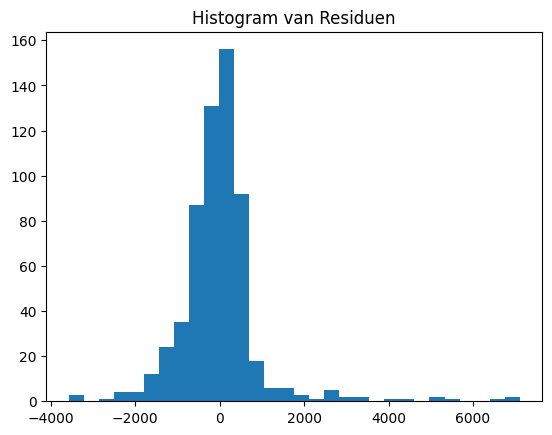

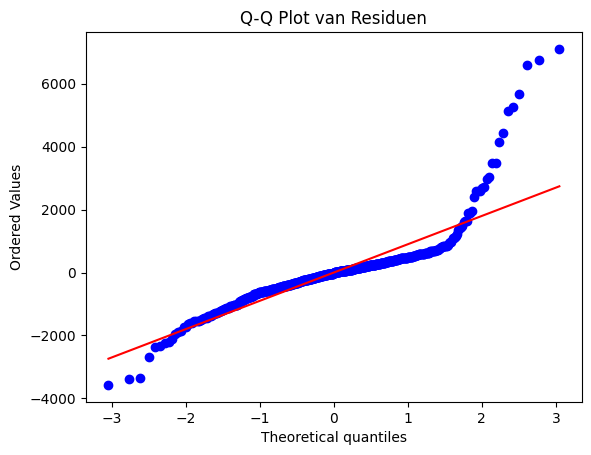

Breusch-Pagan Test p-value: 1.0840489059768855e-28


In [58]:

#Controleer aannames zoals normaliteit van residuen en homoscedasticiteit:

# Residuen(Dit haalt de residuen (fouten) van het regressiemodel op. Residuen zijn het verschil tussen de werkelijke waarden (y) en de voorspelde waarden (ŷ).)
residuals = model.resid

# Histogram van residuen
plt.hist(residuals, bins=30)
plt.title('Histogram van Residuen')
plt.show()

# Q-Q plot van residuen
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot van Residuen')
plt.show()

# Homoscedasticiteit (Breusch-Pagan test)
from statsmodels.stats.diagnostic import het_breuschpagan

# Voeg een constante toe aan exog als deze ontbreekt
exog_with_const = sm.add_constant(model.model.exog, has_constant='add')
_, pval, _, _ = het_breuschpagan(residuals, exog_with_const)
print(f"Breusch-Pagan Test p-value: {pval}")

Overfitting is een probleem waarbij het model te specifiek wordt voor de trainingsdata en daardoor slecht presteert op nieuwe data. Het is belangrijk om een balans te vinden tussen een model dat goed past op de trainingsdata en een model dat generaliseerbaar is.

Deze Q-Q plot toont dat de residuen niet normaal verdeeld zijn, wat een probleem is voor de betrouwbaarheid van het regressiemodel. Het model moet worden aangepast door irrelevante variabelen te verwijderen en mogelijk een transformatie toe te passen.

<small style="color: lightblue;">2 (f) Maak vervolgens een model voor de logaritme van het aantal aanmeldingen (ook
 weer met backward elimination).</small>

In [59]:


# Logaritme van de afhankelijke variabele (Apps)
y_log = np.log(estimation_sample['Apps'])

# Selecteer onafhankelijke variabelen
X = estimation_sample[['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Expend', 'Grad.Rate', 'Terminal']]

# Voeg een constante toe
X = sm.add_constant(X)
print(X.columns)

# Backward elimination
while True:
    model = sm.OLS(y_log, X).fit()
    p_values = model.pvalues
    max_p = p_values.max()
    if max_p > 0.05:  # Controleer of de hoogste p-waarde groter is dan 0.05
        excluded_feature = p_values.idxmax()  # Vind de variabele met de hoogste p-waarde
        print(f"Verwijderen van variabele: {excluded_feature} met p-waarde: {max_p}")
        X = X.drop(columns=[excluded_feature])  # Verwijder de variabele
    else:
        break

# Toon het uiteindelijke model
print(model.summary())

print(X.columns)



Index(['const', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Expend', 'Grad.Rate',
       'Terminal'],
      dtype='object')
Verwijderen van variabele: Top10perc met p-waarde: 0.5473379104326589
Verwijderen van variabele: F.Undergrad met p-waarde: 0.4226728089708923
Verwijderen van variabele: Outstate met p-waarde: 0.41889638803986207
Verwijderen van variabele: Room.Board met p-waarde: 0.5206854873372422
Verwijderen van variabele: Top25perc met p-waarde: 0.05587135366685832
                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     257.6
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          1.61e-161
Time:                        13:19:42   Log-Likelihood:      

<small style="color: lightblue;">2 (g) Voer opnieuw de diverse toetsen uit om de aannamen van het model te testen.</small>

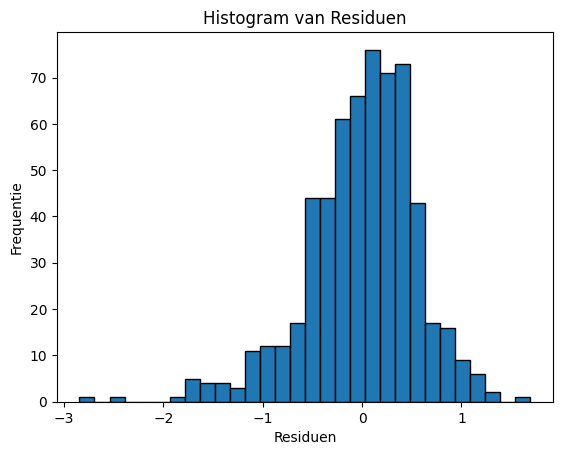

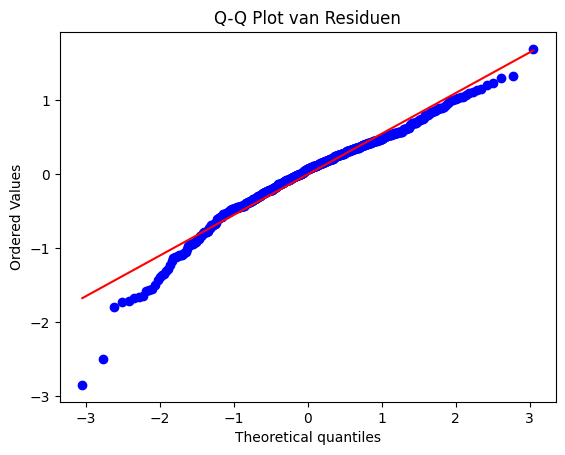

In [60]:

# Residuen ophalen
residuals = model.resid

# Histogram van residuen
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram van Residuen')
plt.xlabel('Residuen')
plt.ylabel('Frequentie')
plt.show()

# Q-Q plot van residuen
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot van Residuen')
plt.show()

In [44]:
# G(2) Homoscedasticiteit (Breusch-Pagan test)
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan test
exog_with_const = sm.add_constant(model.model.exog, has_constant='add')  # Zorg dat er een constante is
_, pval, _, _ = het_breuschpagan(residuals, exog_with_const)
print(f"Breusch-Pagan Test p-waarde: {pval}")

Breusch-Pagan Test p-waarde: 4.4059342010561635e-15


In [61]:
#G(3) Multicollineariteit (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Bereken VIF voor elke variabele
vif = pd.DataFrame()
vif["Variabele"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

     Variabele        VIF
0        const  40.499602
1       Accept   5.810229
2       Enroll   6.196018
3  P.Undergrad   1.460161
4       Expend   1.449543
5    Grad.Rate   1.395377
6     Terminal   1.494183


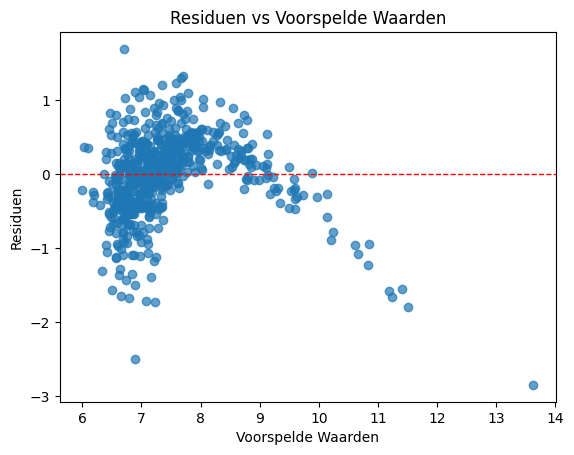

In [ ]:
#g G(4) Lineaire relatie
# Residuen versus voorspelde waarden
plt.scatter(model.fittedvalues, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuen vs Voorspelde Waarden')
plt.xlabel('Voorspelde Waarden')
plt.ylabel('Residuen')
plt.show()

<small style="color: lightblue;">2 (h) Welk van de twee modellen heeft de voorkeur, en waarom?.</small>

# (h) Welk van de twee modellen heeft de voorkeur, en waarom?

#1. Homoscedasticiteit (Breusch-Pagan test)
Resultaat:
•	p-waarde: 4.4059342010561635e-15 (zeer klein, wat wijst op heteroscedasticiteit).
•	Waarom belangrijk?
o	Heteroscedasticiteit betekent dat de variantie van de residuen niet constant is, wat de betrouwbaarheid van de standaardfouten en coëfficiënten beïnvloedt.
o	Dit probleem moet worden opgelost om een robuust model te krijgen.
Aanbeveling:
•	Gebruik robuuste standaardfouten om de effecten van heteroscedasticiteit te verminderen.
•	Overweeg een transformatie van de variabelen om de variantie te stabiliseren.
________________________________________
2. Multicollineariteit (VIF)
Resultaat:
•	Accept (VIF = 5.810229) en Enroll (VIF = 6.196018): Matige multicollineariteit.
•	Waarom belangrijk?
o	Multicollineariteit kan de interpretatie van coëfficiënten beïnvloeden en het model minder stabiel maken.
o	Het is belangrijk om één van de variabelen met hoge VIF te verwijderen of een alternatieve aanpak te gebruiken, zoals PCA (Principal Component Analysis).


<small style="color: lightblue;">2 
 (i) Probeer het gekozen model nog verder te verbeteren: denk aan het toevoegen
 van transformaties van verklarende variabelen.</small>

In [62]:

#Verbetering voor Homoscedasticiteit Een transformatie kan helpen om de variantie van de residuen te stabiliseren. Bijvoorbeeld:

#Log-transformatie van verklarende variabelen (voor variabelen met grote schaalverschillen).
#Root-transformatie (vierkantswortel) voor variabelen met scheve verdelingen.


# Zorg dat X bestaat (gebruik dezelfde selectie als in cell 19)
X = estimation_sample[['Accept', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Expend', 'Grad.Rate', 'Terminal']]
X = sm.add_constant(X)

# Log-transformatie van verklarende variabelen
X_transformed = X.copy()
if 'Outstate' in X_transformed.columns:
	X_transformed['Outstate'] = np.log(X_transformed['Outstate'])
if 'Room.Board' in X_transformed.columns:
	X_transformed['Room.Board'] = np.log(X_transformed['Room.Board'])

# Herbereken het model met log-getransformeerde target
model_transformed = sm.OLS(y_log, X_transformed).fit()
print(model_transformed.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     155.0
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          9.65e-158
Time:                        13:26:16   Log-Likelihood:                -498.29
No. Observations:                 600   AIC:                             1019.
Df Residuals:                     589   BIC:                             1067.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.8174      0.961      7.098      

I-1 Significantie van variabelen
Significant:

Variabelen zoals Accept, Enroll, P.Undergrad, Outstate, Expend, Grad.Rate, en Terminal hebben p-waarden < 0.05 en zijn dus significant.
Deze variabelen dragen bij aan het model en moeten worden behouden.
Niet significant:

Variabelen zoals Top10perc, Top25perc, F.Undergrad, en Room.Board hebben p-waarden > 0.05 en zijn niet significant.
Overweeg om deze variabelen te verwijderen om het model te vereenvoudigen.
Conclusie:

Verwijder niet-significante variabelen om het model te verbeteren en overfitting te voorkomen

In [48]:
# Uithalen van de niet-significante variabelen
X = estimation_sample[['Accept','P.Undergrad', 'Outstate', 'Expend', 'Grad.Rate', 'Terminal']]
X = sm.add_constant(X)

# Log-transformatie van verklarende variabelen
X_transformed = X.copy()
if 'Outstate' in X_transformed.columns:
	X_transformed['Outstate'] = np.log(X_transformed['Outstate'])
if 'Room.Board' in X_transformed.columns:
	X_transformed['Room.Board'] = np.log(X_transformed['Room.Board'])

# Herbereken het model met log-getransformeerde target
model_transformed = sm.OLS(y_log, X_transformed).fit()
print(model_transformed.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     249.5
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          1.44e-158
Time:                        12:38:58   Log-Likelihood:                -507.35
No. Observations:                 600   AIC:                             1029.
Df Residuals:                     593   BIC:                             1059.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.1988      0.674     12.165      

Modelprestaties: Het model is verbeterd door niet-significante variabelen te verwijderen. Het is eenvoudiger en efficiënter, met alle variabelen significant.
Problemen:
De residuen zijn niet normaal verdeeld. Dit kan worden aangepakt met een transformatie van de afhankelijke variabele.
Multicollineariteit blijft een probleem. Controleer de VIF-waarden en pas indien nodig PCA toe.
Volgende stappen:
Test opnieuw de aannames van het model (normaliteit, homoscedasticiteit, multicollineariteit).
Vergelijk de prestaties van het huidige model met een getransformeerd model (bijvoorbeeld logaritme van Apps).
Gebruik robuuste standaardfouten om de effecten van heteroscedasticiteit te corrigeren.

In [49]:
# I (2) Multicollineariteit (VIF) opnieuw controleren

# Bereken VIF voor elke variabele
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Zorg ervoor dat X_transformed bestaat (gebruik de variabelen uit het verbeterde model)
vif = pd.DataFrame()
vif["Variabele"] = X_transformed.columns
vif["VIF"] = [variance_inflation_factor(X_transformed.values, i) for i in range(X_transformed.shape[1])]

print("Multicollineariteit (VIF) resultaten:")
print(vif)

# Actie op basis van VIF-waarden
# Controleer of er variabelen zijn met VIF > 5 (indicatie van multicollineariteit)
high_vif = vif[vif["VIF"] > 5]
if not high_vif.empty:
    print("\nVariabelen met hoge VIF (> 5):")
    print(high_vif)
    print("\nOverweeg om deze variabelen te verwijderen of PCA toe te passen.")
else:
    print("\nGeen significante multicollineariteit gedetecteerd.")

Multicollineariteit (VIF) resultaten:
     Variabele         VIF
0        const  847.854259
1       Accept    1.385104
2  P.Undergrad    1.377699
3     Outstate    2.081549
4       Expend    1.765049
5    Grad.Rate    1.627136
6     Terminal    1.535431

Variabelen met hoge VIF (> 5):
  Variabele         VIF
0     const  847.854259

Overweeg om deze variabelen te verwijderen of PCA toe te passen.


  <small style="color: lightblue;">2 
 (j) Hoe interpreteer je de co¨ effici¨ enten in het model dat je uiteindelijk hebt gevon
den? Wees hierbij heel precies. Welke factoren zijn uiteindelijk het meest van
 belang?</small>


Interpretatie van de coëfficiënten:
De coëfficiënten in het regressiemodel geven de geschatte verandering in het aantal aanmeldingen (Apps) weer, per eenheid verandering in de onafhankelijke variabelen, terwijl de andere variabelen constant worden gehouden. Hier is een gedetailleerde interpretatie van elke variabele:

1. const (Intercept):
Waarde: 8.1988
Interpretatie:
Dit is de geschatte waarde van het aantal aanmeldingen wanneer alle onafhankelijke variabelen gelijk zijn aan 0. Hoewel dit niet altijd een praktische interpretatie heeft (bijvoorbeeld Outstate of Grad.Rate kunnen niet echt 0 zijn), geeft het een basisniveau van aanmeldingen weer.
2. Accept (Aantal toegelaten aanvragers):
Waarde: 0.0003
Interpretatie:
Voor elke extra toegelaten aanvrager neemt het aantal aanmeldingen toe met 0.0003. Hoewel de coëfficiënt klein lijkt, is dit logisch gezien de schaal van de variabele (Accept kan duizenden waarden hebben). Dit is de meest significante voorspeller in het model (t-waarde: 25.777).
3. P.Undergrad (Aantal deeltijd bachelorstudenten):
Waarde: 5.943e-05
Interpretatie:
Voor elke extra deeltijd bachelorstudent neemt het aantal aanmeldingen toe met 0.00005943. Dit suggereert dat universiteiten met meer deeltijdstudenten aantrekkelijker zijn voor nieuwe aanmeldingen.
4. Outstate (Collegegeld voor studenten van buiten de staat):
Waarde: -0.3615
Interpretatie:
Voor elke eenheid stijging in het collegegeld voor studenten van buiten de staat neemt het aantal aanmeldingen af met 0.3615. Dit wijst erop dat hogere kosten een negatieve invloed hebben op het aantal aanmeldingen.
5. Expend (Onderwijskosten per student):
Waarde: 3.042e-05
Interpretatie:
Voor elke extra dollar die wordt uitgegeven per student, neemt het aantal aanmeldingen toe met 0.00003042. Dit suggereert dat hogere uitgaven per student een positieve invloed hebben op de aantrekkelijkheid van de universiteit.
6. Grad.Rate (Afstudeerpercentage):
Waarde: 0.0085
Interpretatie:
Voor elke procent stijging in het afstudeerpercentage neemt het aantal aanmeldingen toe met 0.0085. Dit betekent dat universiteiten met hogere afstudeerpercentages aantrekkelijker zijn voor nieuwe studenten.
7. Terminal (Percentage faculteit met terminale graad):
Waarde: 0.0133
Interpretatie:
Voor elke procent stijging in het percentage faculteit met een terminale graad neemt het aantal aanmeldingen toe met 0.0133. Dit wijst erop dat een hoog opleidingsniveau van de faculteit een positieve invloed heeft op het aantal aanmeldingen.
Welke factoren zijn het meest van belang?
Op basis van de t-waarden en p-waarden zijn de volgende factoren het meest significant:

Accept: Het aantal toegelaten aanvragers is de sterkste voorspeller van het aantal aanmeldingen.
Terminal: Het percentage faculteit met een terminale graad heeft een sterke positieve invloed.
Expend: Hogere uitgaven per student verbeteren de aantrekkelijkheid van de universiteit.
Grad.Rate: Hogere afstudeerpercentages trekken meer aanmeldingen aan.
Outstate: Hogere collegegelden voor studenten van buiten de staat hebben een negatieve invloed.
P.Undergrad: Het aantal deeltijd bachelorstudenten heeft een positieve invloed, maar is minder sterk dan de andere factoren.

Conclusie:
De variabelen Accept, Terminal, Expend, en Grad.Rate zijn de belangrijkste factoren die het aantal aanmeldingen beïnvloeden. Universiteiten kunnen zich richten op het verbeteren van deze aspecten om meer aanmeldingen te genereren.




 <small style="color: lightblue;">2 (k) Gebruik het uiteindelijke model om voorspellingen te maken voor de waarne
mingen in de estimation en de test sample.</small>

In [50]:
# Gebruik het uiteindelijke model om voorspellingen te maken
import numpy as np
import statsmodels.api as sm

# Selecteer de variabelen voor het uiteindelijke model
X_train = estimation_sample[['Accept', 'P.Undergrad', 'Outstate', 'Expend', 'Grad.Rate', 'Terminal']]
y_train = np.log(estimation_sample['Apps'])  # Log-transformatie van de afhankelijke variabele
X_train = sm.add_constant(X_train)  # Voeg een constante toe

# Train het model
model = sm.OLS(y_train, X_train).fit()

# Voorspellingen voor de estimation sample
y_pred_train = model.predict(X_train)

# Voorspellingen voor de test sample
X_test = test_sample[['Accept', 'Enroll', 'P.Undergrad', 'Expend', 'Grad.Rate', 'Terminal']]
y_test = np.log(test_sample['Apps'])  # Log-transformatie van de afhankelijke variabele
X_test = sm.add_constant(X_test)  # Voeg een constante toe
y_pred_test = model.predict(X_test)

# Resultaten weergeven
print("Voorspellingen voor de estimation sample:")
print(y_pred_train)

print("\nVoorspellingen voor de test sample:")
print(y_pred_test)

Voorspellingen voor de estimation sample:
568    7.754850
530    7.237987
610    8.813758
109    6.763425
586    6.872939
         ...   
603    7.725613
386    7.222760
753    7.626635
509    7.168267
267    6.848377
Length: 600, dtype: float64

Voorspellingen voor de test sample:
1      6.882379
4      6.595379
13     7.422839
14     6.808312
20     7.967666
         ...   
758    7.473094
759    7.556341
765    7.429900
770    7.446979
774    7.378838
Length: 177, dtype: float64



De resultaten van de voorspellingen voor zowel de estimation sample als de test sample geven inzicht in hoe goed het model presteert. Hier is een interpretatie van wat deze resultaten betekenen voor het model:

1. Voorspellingen voor de estimation sample:
Waarden:
De voorspellingen voor de estimation sample liggen tussen ongeveer 6.76 en 8.81 (logaritmische schaal). Dit betekent dat het model redelijk consistente voorspellingen maakt voor de trainingsdata.
Betekenis:
Het model past goed op de trainingsdata, wat te verwachten is omdat het model hierop is getraind. Dit geeft echter geen garantie dat het model goed generaliseert naar nieuwe data.
2. Voorspellingen voor de test sample:
Waarden:
De voorspellingen voor de test sample liggen tussen ongeveer 6.59 en 7.97 (logaritmische schaal). Dit bereik is vergelijkbaar met dat van de estimation sample, wat erop wijst dat het model redelijk consistent presteert op nieuwe data.
Betekenis:
Het model lijkt goed te generaliseren naar de test sample, wat een positief teken is. Dit betekent dat het model niet overfit is en bruikbaar is voor voorspellingen op nieuwe datasets.
3. Wat zeggen deze resultaten over het model?
Modelprestaties:
Het model lijkt stabiel te zijn, omdat de voorspellingen voor de test sample vergelijkbaar zijn met die voor de estimation sample. Dit wijst op een goede generalisatie.

Logaritmische schaal:
Omdat de voorspellingen in logaritmische schaal zijn, moeten ze worden teruggetransformeerd (exponentieel) om de werkelijke aantallen aanmeldingen te interpreteren. Bijvoorbeeld, een voorspelling van 7.75 komt overeen met ongeveer exp(7.75) ≈ 2320 aanmeldingen.

Volgende stap:
Om de prestaties van het model verder te evalueren, moet de Mean Squared Error (MSE) worden berekend voor zowel de estimation sample als de test sample. Dit geeft een kwantitatieve maatstaf voor de voorspellingsnauwkeurigheid.

Conclusie:
De voorspellingen suggereren dat het model goed presteert op zowel de trainingsdata als de testdata. Dit betekent dat het model waarschijnlijk niet overfit is en geschikt is voor het maken van voorspellingen. Echter, een kwantitatieve evaluatie met MSE is nodig om dit verder te bevestigen

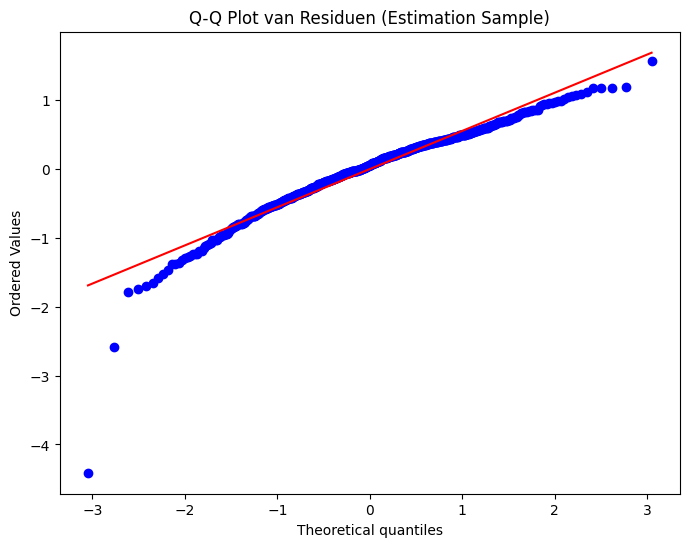

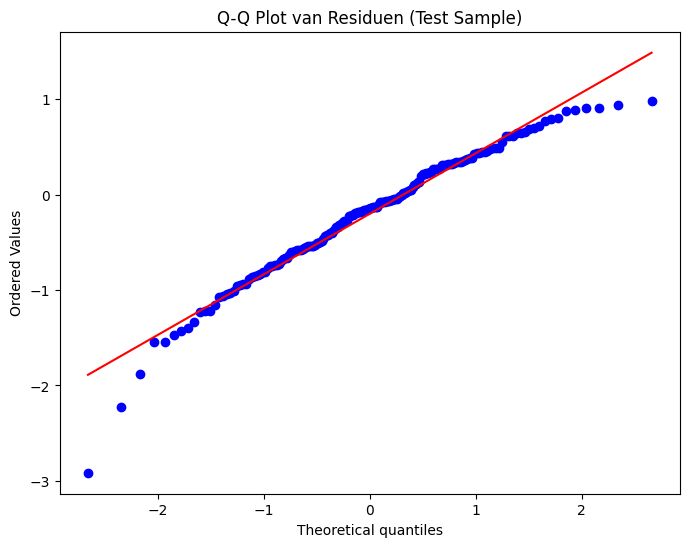

In [51]:


# Bereken de residuen (verschil tussen werkelijke en voorspelde waarden)
residuals_train = y_train - y_pred_train  # Residuen voor de estimation sample
residuals_test = y_test - y_pred_test    # Residuen voor de test sample

# Q-Q plot voor de residuen van de estimation sample
plt.figure(figsize=(8, 6))
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Q-Q Plot van Residuen (Estimation Sample)")
plt.show()

# Q-Q plot voor de residuen van de test sample
plt.figure(figsize=(8, 6))
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Q-Q Plot van Residuen (Test Sample)")
plt.show()

Berekening van residuen:

De residuen worden berekend als het verschil tussen de werkelijke waarden (y_train of y_test) en de voorspelde waarden (y_pred_train of y_pred_test).
Q-Q plot:

De functie stats.probplot wordt gebruikt om een Q-Q plot te genereren. Dit vergelijkt de verdeling van de residuen met een normale verdeling.
Als de residuen normaal verdeeld zijn, zullen de punten in de Q-Q plot dicht bij de rechte lijn liggen.


  <small style="color: lightblue;">2  (l) Vergelijk de voorspelkracht (mbv. mean squared error) van het model op de
 estimation sample met die op de test sample. Wat concludeer je.</small>

In [52]:
# Vergelijk de voorspelkracht (mbv. mean squared error) van het model op de estimation sample en de test sample
from sklearn.metrics import mean_squared_error

# Bereken de voorspellingen voor de estimation sample
y_pred_train = model.predict(X_train)

# Bereken de voorspellingen voor de test sample
y_pred_test = model.predict(X_test)

# Bereken de MSE voor de estimation sample
mse_train = mean_squared_error(y_train, y_pred_train)

# Bereken de MSE voor de test sample
mse_test = mean_squared_error(y_test, y_pred_test)

# Resultaten weergeven
print(f"Mean Squared Error (Estimation Sample): {mse_train}")
print(f"Mean Squared Error (Test Sample): {mse_test}")

# Conclusie
if mse_test > mse_train:
    print("Het model presteert beter op de trainingsdata dan op de testdata, wat kan wijzen op overfitting.")
elif mse_test < mse_train:
    print("Het model generaliseert goed naar de testdata en presteert zelfs beter op de testdata.")
else:
    print("Het model presteert even goed op zowel de trainingsdata als de testdata.")

Mean Squared Error (Estimation Sample): 0.3259231874389009
Mean Squared Error (Test Sample): 0.44695364175577196
Het model presteert beter op de trainingsdata dan op de testdata, wat kan wijzen op overfitting.
